In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import tree

# Data Preprocessing

In [ ]:
diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#Memeriksa type data dari setiap colomn nya

diabetes_data.info()

In [ ]:
#  untuk menampilkan deskriptif statistik data. Hanya kolom yang bertipe numerik yang akan ditampilkan statistiknya.
diabetes_data.describe().transpose() 


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Handling Missing Value**

In [ ]:
# Memeriksa data null pada masing-masing kolom

print(diabetes_data.shape)
diabetes_data.isnull().sum()

(768, 9)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Cek Duplikasi Data**

In [ ]:
print('Data Duplicate :', diabetes_data.duplicated().sum())
diabetes_data[diabetes_data.duplicated()]

Data Duplicate : 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


**Feature Encoding**

In [ ]:
# Mengubah feature kategorik menjadi numerik

diabetes_data_encode = diabetes_data.copy()

**Handling Outliers**

In [ ]:
# Outliers adalah nilai yang menyimpang pada dataset

diabetes_data.copy = diabetes_data_encode.copy()

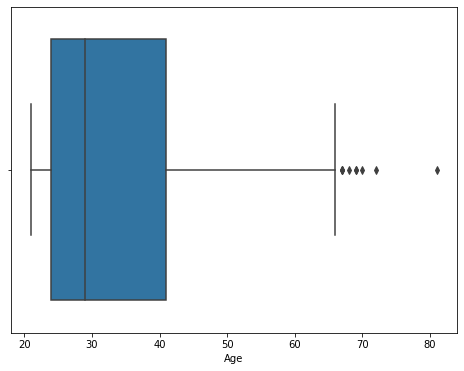

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x=diabetes_data.copy['Age'])

In [ ]:
# outlier akan ditangani dengan pendekatan interquartile dan mean value. 
# Pertama, data point yang lebih besar dari cutoff, dianggap outlier.
# cutoff ditentukan dengan rumus Q1 + 1.5 * IQR
# Karena dataset kecil, data outlier tidak akan dihapus, namun akan diganti dengan nilai mean dari non outlier.

Q1 = diabetes_data.copy['Age'].quantile(0.25)
Q3 = diabetes_data.copy['Age'].quantile(0.75)

IQR = Q3 - Q1

diabetes_data.copy['Age'] = diabetes_data.copy['Age'].mask(((diabetes_data.copy['Age'] > (Q3+(1.5*IQR)))), (Q3+(1.5*IQR)))
diabetes_data.copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50.0,1
1,1,85,66,29,0,26.6,0.351,31.0,0
2,8,183,64,0,0,23.3,0.672,32.0,1
3,1,89,66,23,94,28.1,0.167,21.0,0
4,0,137,40,35,168,43.1,2.288,33.0,1


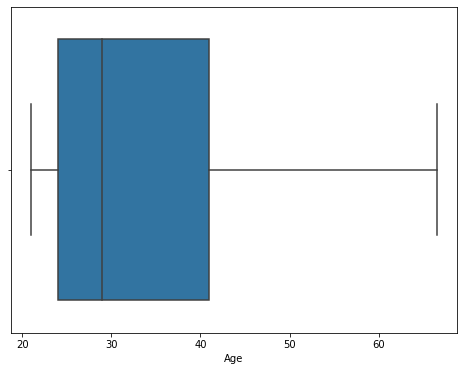

In [ ]:
# Periksa Outliers Yang Sudah Dibersihkan
plt.figure(figsize=(8,6))
sns.boxplot(x=diabetes_data.copy['Age'])

**Split Data**

Data dibagi dalam set data train dan data tes, dengan proporsi yang dapat ditentukan sesuai kebutuhan

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = diabetes_data_encode.drop(columns=['Pregnancies'])
Y = diabetes_data_encode['Pregnancies']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

**Feature Scalling**

Transformasi nilai dari data menjadi skala tertentu

In [ ]:
# Normalisasi hanya di data training

scaler = MinMaxScaler()
columns = list(X_train.columns)
scaler.fit(X_train[columns])

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_check = X_train
X_check

X_train[columns] = X_train_scaled
X_test[columns] = X_test_scaled

In [ ]:
X_train.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
660,0.814070,0.736842,0.000000,0.000000,0.412817,0.044406,0.647059,0.0
69,0.733668,0.745614,0.272727,0.118203,0.430700,0.047395,0.117647,0.0
85,0.552764,0.649123,0.292929,0.147754,0.482861,0.264731,0.117647,0.0
219,0.562814,0.578947,0.000000,0.000000,0.563338,0.078138,0.392157,1.0
712,0.648241,0.543860,0.363636,0.000000,0.614009,0.154996,0.333333,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


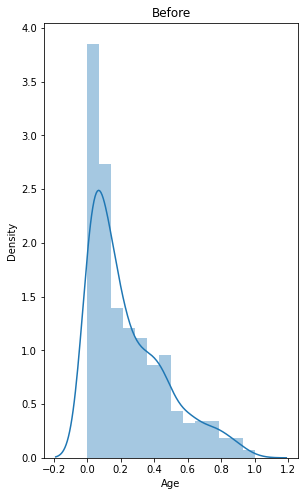

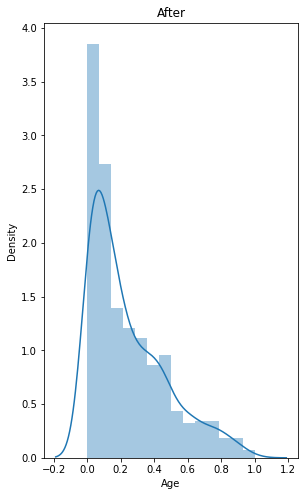

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(1,2,1)
plt.title('Before')
sns.distplot(X_train['Age'])

plt.figure(figsize=(10,8))
plt.subplot(1,2,2)
plt.title('After')
sns.distplot(X_check['Age'])

# **Dataset  Wine**

In [ ]:
wine_data = load_wine()
wine = pd.DataFrame(wine_data.data)
wine
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       178 non-null    float64
 1   1       178 non-null    float64
 2   2       178 non-null    float64
 3   3       178 non-null    float64
 4   4       178 non-null    float64
 5   5       178 non-null    float64
 6   6       178 non-null    float64
 7   7       178 non-null    float64
 8   8       178 non-null    float64
 9   9       178 non-null    float64
 10  10      178 non-null    float64
 11  11      178 non-null    float64
 12  12      178 non-null    float64
dtypes: float64(13)
memory usage: 18.2 KB


In [ ]:
print("Features Name : ", wine_data.feature_names)
print("Shape: ", wine.shape)
print("Dataset :\n", wine.head())

Features Name :  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Shape:  (178, 13)
Dataset :
       0     1     2     3      4     5     6     7     8     9     10    11  \
0  14.23  1.71  2.43  15.6  127.0  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1  13.20  1.78  2.14  11.2  100.0  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2  13.16  2.36  2.67  18.6  101.0  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3  14.37  1.95  2.50  16.8  113.0  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4  13.24  2.59  2.87  21.0  118.0  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

       12  
0  1065.0  
1  1050.0  
2  1185.0  
3  1480.0  
4   735.0  


In [ ]:
X = wine.values[:, 0:13]
Y = wine_data.target

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.4, random_state = 100)

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train1, Y_train1)
clf.fit(X_train2, Y_train2)
clf.fit(X_train3, Y_train3)

Y_pred1 = clf.predict(X_test1)
Y_pred2 = clf.predict(X_test2)
Y_pred3 = clf.predict(X_test3)

print(f"Data Testing 20%: {Y_pred1}")
print(f"Data Testing 30%: {Y_pred2}")
print(f"Data Testing 40%: {Y_pred3}")

Data Testing 20%: [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1]
Data Testing 30%: [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1]
Data Testing 40%: [1 2 0 0 1 1 1 2 1 0 2 1 2 2 2 0 2 0 1 0 0 0 2 1 0 0 1 1 1 2 2 1 0 1 2 1 1
 1 2 2 0 1 2 2 0 2 2 2 0 0 0 1 0 1 2 2 0 0 1 1 0 2 0 1 1 2 1 0 0 1 0 0]


|--- feature_12 <= 760.00
|   |--- feature_6 <= 1.27
|   |   |--- feature_10 <= 1.00
|   |   |   |--- class: 2
|   |   |--- feature_10 >  1.00
|   |   |   |--- class: 1
|   |--- feature_6 >  1.27
|   |   |--- feature_0 <= 13.17
|   |   |   |--- class: 1
|   |   |--- feature_0 >  13.17
|   |   |   |--- feature_1 <= 2.12
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  2.12
|   |   |   |   |--- class: 0
|--- feature_12 >  760.00
|   |--- feature_6 <= 1.61
|   |   |--- feature_6 <= 0.90
|   |   |   |--- class: 2
|   |   |--- feature_6 >  0.90
|   |   |   |--- class: 1
|   |--- feature_6 >  1.61
|   |   |--- class: 0



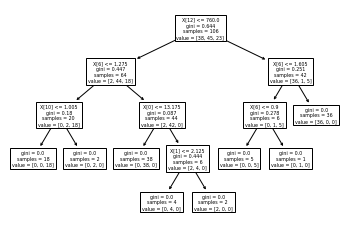

In [ ]:
tree.plot_tree(clf)
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
y_pred = clf.predict(X_test1)
print(f"Persentase Data Testing {int(0.2*100)}%")
acc = accuracy_score(Y_test1,Y_pred1)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test1, Y_pred1)
print(f"Confusion Matrix:\n{matrix}\n")

y_pred = clf.predict(X_test2)
print(f"Persentase Data Testing {int(0.3*100)}%")
acc = accuracy_score(Y_test2,Y_pred2)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test2, Y_pred2)
print(f"Confusion Matrix:\n{matrix}\n")

y_pred = clf.predict(X_test3)
print(f"Persentase Data Testing {int(0.4*100)}%")
acc = accuracy_score(Y_test3,Y_pred3)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test3, Y_pred3)
print(f"Confusion Matrix:\n{matrix}\n")

Persentase Data Testing 20%
Akurasi: 77.77777777777779%
Confusion Matrix:
[[ 8  0  0]
 [ 2 11  2]
 [ 1  3  9]]

Persentase Data Testing 30%
Akurasi: 83.33333333333334%
Confusion Matrix:
[[14  0  0]
 [ 2 15  2]
 [ 1  4 16]]

Persentase Data Testing 40%
Akurasi: 86.11111111111111%
Confusion Matrix:
[[21  0  0]
 [ 3 21  2]
 [ 1  4 20]]



# **Dataset Pima Indian Diabetes**

In [ ]:
db = pd.DataFrame(diabetes_data)
print("Shape: ", db.shape)
print("Dataset :\n", db.head())

Shape:  (768, 9)
Dataset :
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
X = diabetes_data.values[:, 0:8]
Y = diabetes_data.values[:, 8]

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.4, random_state = 100)

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train1, Y_train1)
clf.fit(X_train2, Y_train2)
clf.fit(X_train3, Y_train3)

Y_pred1 = clf.predict(X_test1)
Y_pred2 = clf.predict(X_test2)
Y_pred3 = clf.predict(X_test3)

print(f"Data Testing 20%: {Y_pred1}")
print(f"Data Testing 30%: {Y_pred2}")
print(f"Data Testing 40%: {Y_pred3}")

Data Testing 20%: [0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
Data Testing 30%: [0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0

|--- feature_1 <= 127.50
|   |--- feature_7 <= 32.50
|   |   |--- feature_0 <= 6.50
|   |   |   |--- feature_5 <= 30.95
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_5 >  30.95
|   |   |   |   |--- feature_6 <= 0.50
|   |   |   |   |   |--- feature_2 <= 22.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- feature_2 >  22.00
|   |   |   |   |   |   |--- feature_5 <= 31.30
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_5 >  31.30
|   |   |   |   |   |   |   |--- feature_5 <= 49.05
|   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |--- feature_5 >  49.05
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_6 >  0.50
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_5 <= 34.05
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- feature_5 >  34.05
|   |   |   |   |   |   |   |--- feature_4 <= 203.00
|   |   |   |   |   |   |   | 

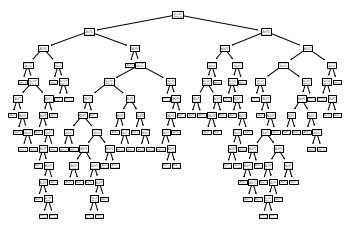

In [ ]:
tree.plot_tree(clf)
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
y_pred = clf.predict(X_test1)
print(f"Persentase Data Testing {int(0.2*100)}%")
acc = accuracy_score(Y_test1,Y_pred1)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test1, Y_pred1)
print(f"Confusion Matrix:\n{matrix}\n")

y_pred = clf.predict(X_test2)
print(f"Persentase Data Testing {int(0.3*100)}%")
acc = accuracy_score(Y_test2,Y_pred2)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test2, Y_pred2)
print(f"Confusion Matrix:\n{matrix}\n")

y_pred = clf.predict(X_test3)
print(f"Persentase Data Testing {int(0.4*100)}%")
acc = accuracy_score(Y_test3,Y_pred3)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test3, Y_pred3)
print(f"Confusion Matrix:\n{matrix}\n")

Persentase Data Testing 20%
Akurasi: 69.48051948051948%
Confusion Matrix:
[[76 25]
 [22 31]]

Persentase Data Testing 30%
Akurasi: 70.12987012987013%
Confusion Matrix:
[[110  40]
 [ 29  52]]

Persentase Data Testing 40%
Akurasi: 72.07792207792207%
Confusion Matrix:
[[149  47]
 [ 39  73]]



# **Dataset Breast Cancer**

In [ ]:
bc_data = load_breast_cancer()
bc = pd.DataFrame(bc_data.data)
bc
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    float64
 1   1       569 non-null    float64
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [ ]:
print("Features Name : ", bc_data.feature_names)
print("Shape: ", bc.shape)
print("Dataset :\n", bc.head())

Features Name :  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Shape:  (569, 30)
Dataset :
       0      1       2       3        4        5       6        7       8   \
0  17.99  10.38  122.80  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   
2  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790  0.2069   
3  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520  0.2597   
4  20.29 

In [ ]:
X = bc.values[:, 0:30]
Y = bc_data.target

X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size = 0.2, random_state = 100)
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.3, random_state = 100)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(X, Y, test_size = 0.4, random_state = 100)

clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train1, Y_train1)
clf.fit(X_train2, Y_train2)
clf.fit(X_train3, Y_train3)

Y_pred1 = clf.predict(X_test1)
Y_pred2 = clf.predict(X_test2)
Y_pred3 = clf.predict(X_test3)

print(f"Data Testing 20%: {Y_pred1}")
print(f"Data Testing 30%: {Y_pred2}")
print(f"Data Testing 40%: {Y_pred3}")

Data Testing 20%: [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1]
Data Testing 30%: [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1]
Data Testing 40%: [0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 0 1 1
 1 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0
 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 

|--- feature_27 <= 0.14
|   |--- feature_13 <= 36.47
|   |   |--- feature_27 <= 0.13
|   |   |   |--- feature_21 <= 33.10
|   |   |   |   |--- class: 1
|   |   |   |--- feature_21 >  33.10
|   |   |   |   |--- feature_21 <= 33.80
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_21 >  33.80
|   |   |   |   |   |--- class: 1
|   |   |--- feature_27 >  0.13
|   |   |   |--- feature_18 <= 0.01
|   |   |   |   |--- class: 0
|   |   |   |--- feature_18 >  0.01
|   |   |   |   |--- feature_9 <= 0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_9 >  0.06
|   |   |   |   |   |--- class: 1
|   |--- feature_13 >  36.47
|   |   |--- feature_21 <= 22.76
|   |   |   |--- class: 1
|   |   |--- feature_21 >  22.76
|   |   |   |--- feature_4 <= 0.08
|   |   |   |   |--- class: 1
|   |   |   |--- feature_4 >  0.08
|   |   |   |   |--- class: 0
|--- feature_27 >  0.14
|   |--- feature_23 <= 710.20
|   |   |--- feature_27 <= 0.18
|   |   |   |--- class: 1
|   |   |--- featu

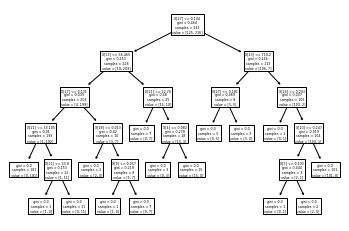

In [ ]:
tree.plot_tree(clf)
text_representation = tree.export_text(clf)
print(text_representation)

In [ ]:
y_pred = clf.predict(X_test1)
print(f"Persentase Data Testing {int(0.2*100)}%")
acc = accuracy_score(Y_test1,Y_pred1)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test1, Y_pred1)
print(f"Confusion Matrix:\n{matrix}\n")

y_pred = clf.predict(X_test2)
print(f"Persentase Data Testing {int(0.3*100)}%")
acc = accuracy_score(Y_test2,Y_pred2)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test2, Y_pred2)
print(f"Confusion Matrix:\n{matrix}\n")

y_pred = clf.predict(X_test3)
print(f"Persentase Data Testing {int(0.4*100)}%")
acc = accuracy_score(Y_test3,Y_pred3)*100
print(f"Akurasi: {acc}%")
matrix = confusion_matrix(Y_test3, Y_pred3)
print(f"Confusion Matrix:\n{matrix}\n")

Persentase Data Testing 20%
Akurasi: 92.10526315789474%
Confusion Matrix:
[[43  6]
 [ 3 62]]

Persentase Data Testing 30%
Akurasi: 91.81286549707602%
Confusion Matrix:
[[60  9]
 [ 5 97]]

Persentase Data Testing 40%
Akurasi: 92.10526315789474%
Confusion Matrix:
[[ 77  10]
 [  8 133]]

